In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WholesaleCustomerData.csv')

In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
print("Number of rows:", df.shape[0], "\n""Number of columns:", df.shape[1])

Number of rows: 440 
Number of columns: 9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [9]:
# List of products

products = ['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']

In [12]:
import pandas as pd

# Calculate the total spending by region
total_spending_by_region = df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum()

# Calculate the total spending by channel
total_spending_by_channel = df.groupby('Channel')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum()

# Determine the region and channel that spent the most and the least
region_spent_most = total_spending_by_region.sum(axis=1).idxmax()
region_spent_least = total_spending_by_region.sum(axis=1).idxmin()
channel_spent_most = total_spending_by_channel.sum(axis=1).idxmax()
channel_spent_least = total_spending_by_channel.sum(axis=1).idxmin()

# Print the results
print("Region that spent the most:", region_spent_most)
print('Total: ',total_spending_by_region.sum(axis=1).max())
print()

print("Region that spent the least:", region_spent_least)
print('Total: ',total_spending_by_region.sum(axis=1).min())
print()

print("Channel that spent the most:", channel_spent_most)
print('Total: ',total_spending_by_channel.sum(axis=1).max())
print()

print("Channel that spent the least:", channel_spent_least)
print('Total: ',total_spending_by_channel.sum(axis=1).min())



Region that spent the most: Other
Total:  10677599

Region that spent the least: Oporto
Total:  1555088

Channel that spent the most: Hotel
Total:  7999569

Channel that spent the least: Retail
Total:  6619931


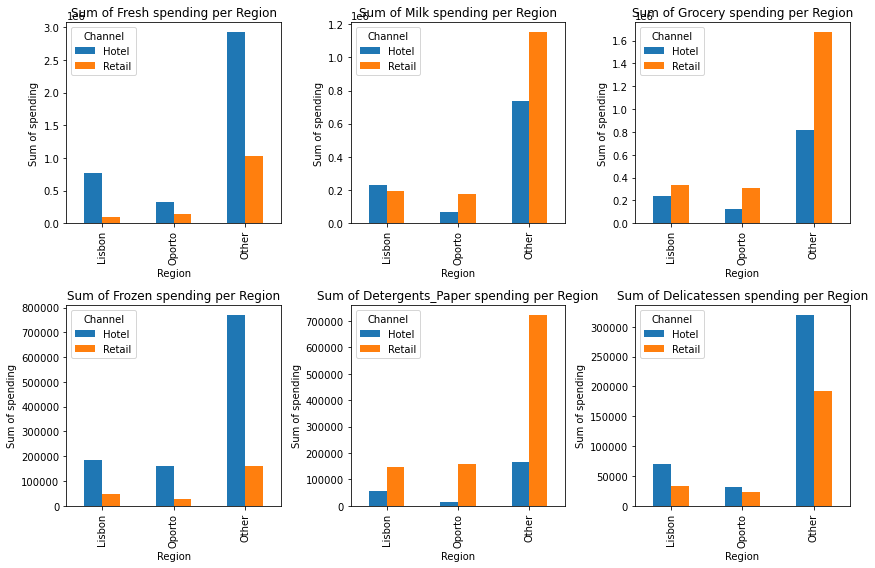

In [10]:
# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Iterate over products
for i, product in enumerate(products):
    row = i // 3  # Calculate the row index
    col = i % 3  # Calculate the column index

    cross_tab = pd.crosstab(df['Region'], df['Channel'], values=df[product], aggfunc='sum')
    ax = axes[row, col]  # Select the corresponding axis
    cross_tab.plot(kind='bar', ax=ax)
    ax.set_title(f'Sum of {product} spending per Region')
    ax.set_ylabel('Sum of spending')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [9]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


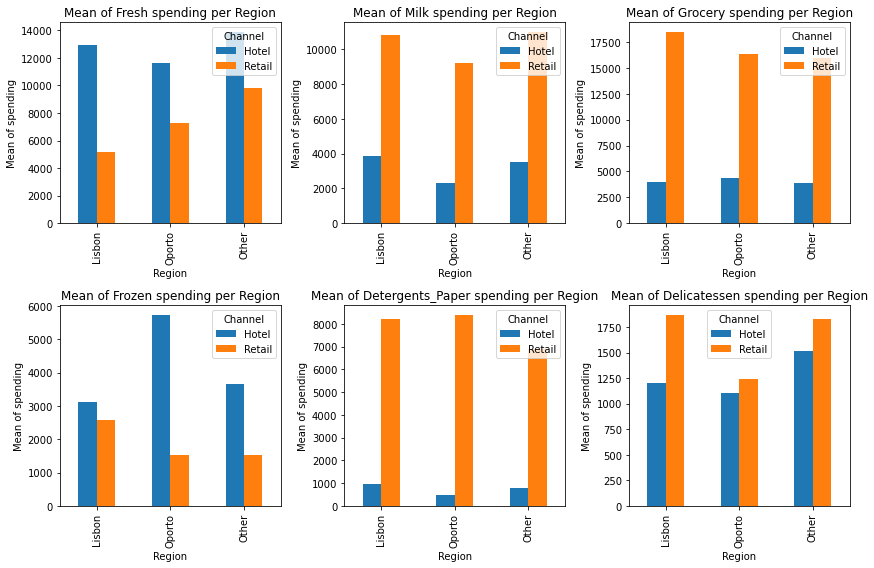

In [35]:

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Iterate over products
for i, product in enumerate(products):
    row = i // 3  # Calculate the row index
    col = i % 3  # Calculate the column index

    cross_tab = pd.crosstab(df['Region'], df['Channel'], values=df[product], aggfunc='mean')
    ax = axes[row, col]  # Select the corresponding axis
    cross_tab.plot(kind='bar', ax=ax)
    ax.set_title(f'Mean of {product} spending per Region')
    ax.set_ylabel('Mean of spending')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### 1. If we take a look at the mean spending of each product per region, we can see that almost all Hotels and Retailers in each 
###    region have somewhat similar average spending on each product
### 2. HOTELS on average spend much more on FRESH and FROZEN  products throughout the three regions than retailers
### 3. RETAILERS on average spend more on MILK, GROCERY and DETERGENT_PAPER than Hotels do.
### 4. Hotels and retailers spend similar amounts on DELICATESSEN products except in Lisbon, where the retailers spend more on Delicatessen.


In [15]:
# Calculate standard deviation and coefficient of variation for each column
for column in products:
    mean = np.round(np.mean(df[column]) , 3 )
    std_dev = np.round( df[column].std() , 3)
    coefficient_of_variation = np.round( (std_dev / df[column].mean()) , 3)

    print(f"Coefficient of Variation of {column}: {coefficient_of_variation}")


Coefficient of Variation of Fresh: 1.054
Coefficient of Variation of Milk: 1.273
Coefficient of Variation of Grocery: 1.195
Coefficient of Variation of Frozen: 1.58
Coefficient of Variation of Detergents_Paper: 1.655
Coefficient of Variation of Delicatessen: 1.849


### All materials have a very high coefficient of variation which means all products have a very high variability in them. But in comparison with each other, FRESH products seem to have the least variability and DELICATESSEN products seem to have the highest variability

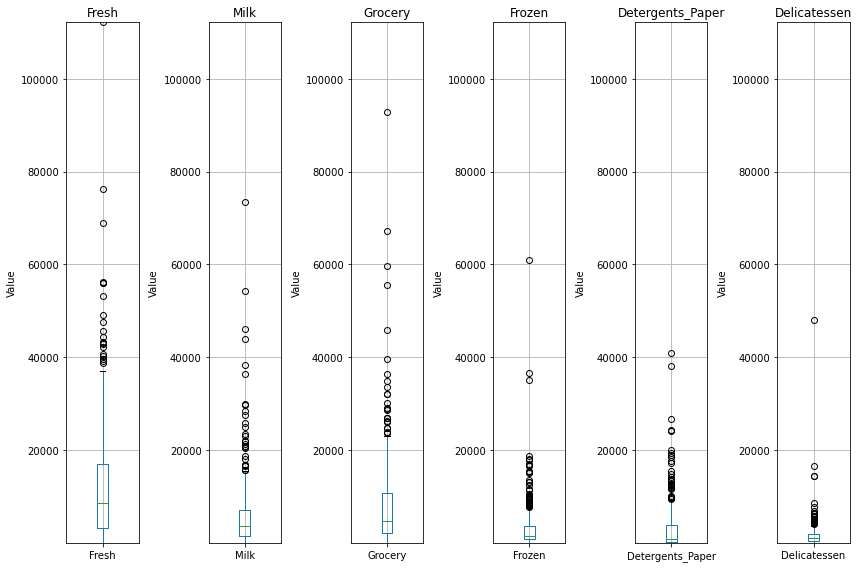

In [64]:
# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(products), figsize=(12, 8))

# Generate boxplots for each variable
max_value = df[products].max().max()  # Get the maximum value among all columns
min_value = df[products].min().min()  # Get the minimum value among all columns

for i, product in enumerate(products):
    ax = axes[i]  # Select the corresponding axis
    df.boxplot(column=product, ax=ax)
    ax.set_title(product)
    ax.set_ylabel("Value")
    ax.set_ylim(min_value, max_value)  # Set the y-axis range for all boxplots

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### All the products have outliers in the data and most of the data seems to be right skewed as visible form the boxplots. 

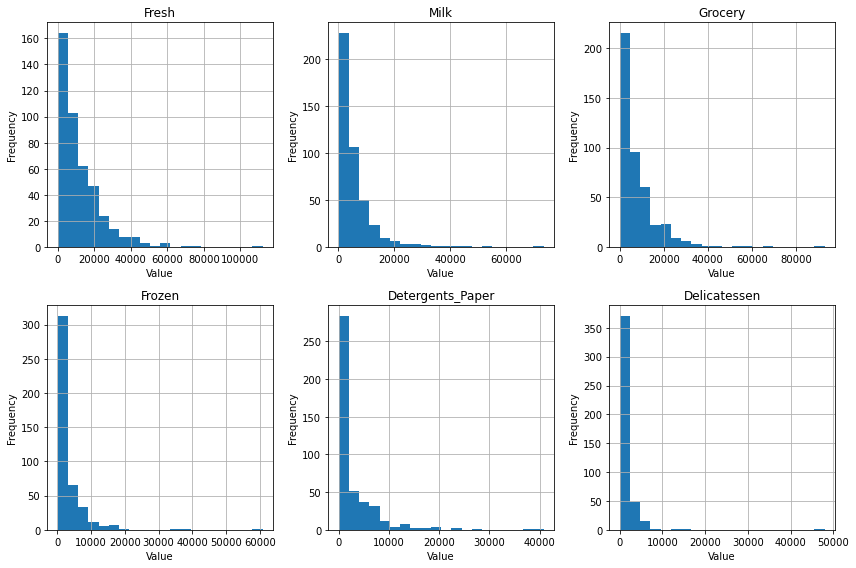

In [61]:
# Create a figure and axes with a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Generate histograms for each variable and place them in the grid
for i, product in enumerate(products):
    row = i // 3  # Determine the row index
    col = i % 3   # Determine the column index
    ax = axes[row, col]  # Select the corresponding axis in the grid
    df[product].hist(ax=ax, bins=20)  # Adjust the number of bins as needed
    ax.set_title(product)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
